In [1]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from dateutil import parser
from textblob import TextBlob
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
stop_words = set(stopwords.words("english"))

In [14]:
data = pd.read_csv('TWITTER4OUTPUT.csv')
print ("Original 'TwitterReviews.csv' CSV Data: \n")
data.tail()

Original 'TwitterReviews.csv' CSV Data: 



,REVIEW,LIKES,RETWEETS,REPLIES,DATE
40,@HSBC_UK\n is there an issue with mobile banki...,7,3,1,8 Dec 2021
41,"Hi there Jennifer, I'm sorry to hear about thi...",7,3,1,8 Dec 2021
42,"@HSBC_UK\n hiya, had your mobile banking login...",7,3,1,8 Dec 2021
43,"@HSBC_IN\n Hey guys, what’s wrong with the mob...",7,3,1,7 Dec 2021
44,"Hi there, I would suggest going in to the app ...",7,3,1,6 Dec 2021


In [4]:
column_name1 = "Likes"
like_sum = data["LIKES"].sum()
like_sum

260

In [5]:
column_name1 = "Retweets"
retweets_sum = data[" RETWEETS"].sum()
retweets_sum

79

In [6]:
column_name1 = "Replies"
replies_sum = data["REPLIES"].sum()
replies_sum

115

In [7]:
likes = 0
for i in data["LIKES"]:
    likes = likes + i

In [8]:
retweets = 0
for i in data[" RETWEETS"]:
    retweets = retweets + i

In [9]:
replies = 0
for i in data["REPLIES"]:
    replies = replies + i

Text(0, 0.5, 'Number of reactions')

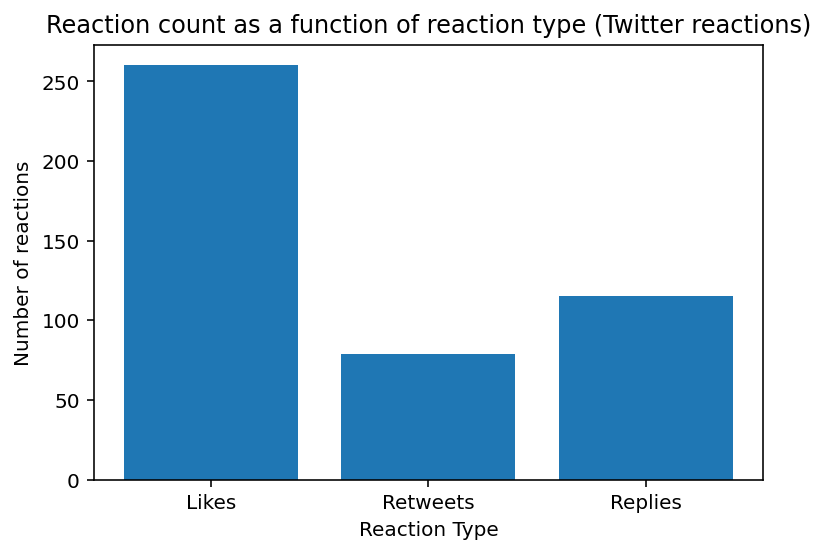

In [10]:
vals = [likes, retweets, replies]
inds=range(len(vals))
labels=["Likes", "Retweets", "Replies"]

fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title('Reaction count as a function of reaction type (Twitter reactions)')
plt.xlabel('Reaction Type')
plt.ylabel('Number of reactions')

In [15]:
from csv import reader

outfile = open("TwitterReviews.txt", "w")
with open('TWITTER4OUTPUT.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['REVIEW'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

Selamat pagi. Pembayaran kartu kredit HSBC dapat dilakukan dengan menggunakan metode transfer baik melalui mobile Banking/Internet banking HSBC. Anda dapat pilih menu transfer kemudian pilih Other HSBC Credit Card. ^AZ
and clicking the chat icon on the lower right part of the page, which will appear after a few seconds. You may also send a secure message from your HSBC desktop online banking service. Or, if you have the mobile banking app...2/3 GV
and clicking the chat icon on the lower right part of the page, which will appear after a few seconds. You may also send a secure message from your HSBC desktop online banking service. Or, if you have the mobile banking app...2/3 GV
@HSBC_UK
 mobile banking is shit .
And you'll be contacted in due course with the outcome. In the meantime, you can check with our chat agents through online or mobile banking or any updates. (2/2) ^Tij
I want to pay hsbc cred card of another bank debit card. Can’t pay on app, can’t pay mobile banking, can’t pay o

UnicodeEncodeError: 'charmap' codec can't encode characters in position 0-2: character maps to <undefined>

In [16]:
comments = []
with open ("TWITTER4OUTPUT.csv", "r", encoding ='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['REVIEW', 'LIKES', ' RETWEETS', 'REPLIES', 'DATE']
['Selamat pagi. Pembayaran kartu kredit HSBC dapat dilakukan dengan menggunakan metode transfer baik melalui mobile Banking/Internet banking HSBC. Anda dapat pilih menu transfer kemudian pilih Other HSBC Credit Card. ^AZ', '1 ', '0 ', '0 ', '12 hours ago']
['and clicking the chat icon on the lower right part of the page, which will appear after a few seconds. You may also send a secure message from your HSBC desktop online banking service. Or, if you have the mobile banking app...2/3 GV', '1 ', '0 ', '0 ', '7 Jan']
['and clicking the chat icon on the lower right part of the page, which will appear after a few seconds. You may also send a secure message from your HSBC desktop online banking service. Or, if you have the mobile banking app...2/3 GV', '1 ', '0 ', '0 ', '7 Jan']
['@HSBC_UK\n mobile banking is shit .', '1 ', '0 ', '0 ', '5 Jan']
["And you'll be contacted in due course with the outcome. In the meantime, you can check with ou

In [17]:
del comments[0]

In [18]:
review = comments[40][0].lower()
print (review)
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

@hsbc_uk
 is there an issue with mobile banking, not been able to access now for a few days with either touch id or passcode
Sentiment(polarity=0.15, subjectivity=0.3625)


In [19]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[0])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

<function matplotlib.pyplot.show(close=None, block=None)>

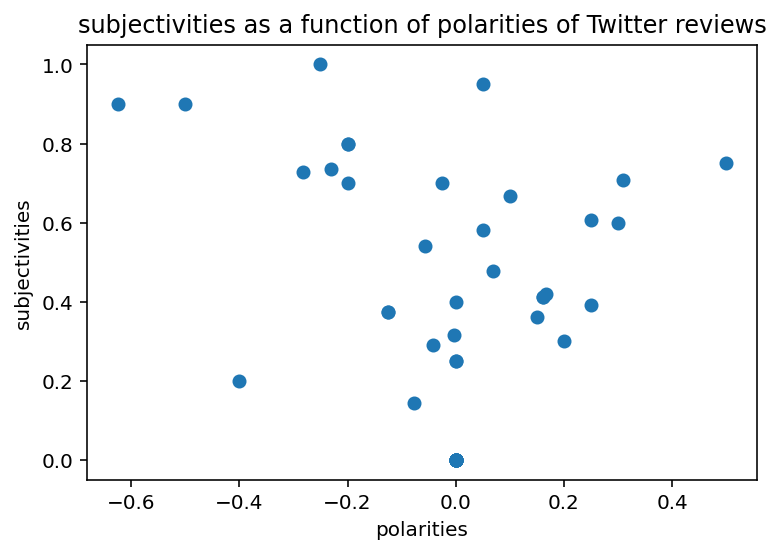

In [20]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of Twitter reviews")
plt.show

In [21]:
data ["SUBJECTIVITY"] = subjectivities 
data ["POLARITY"] = polarities
full_data = data
full_data

,REVIEW,LIKES,RETWEETS,REPLIES,DATE,SUBJECTIVITY,POLARITY
0,Selamat pagi. Pembayaran kartu kredit HSBC dap...,1,0,0,12 hours ago,0.375000,-0.125000
1,and clicking the chat icon on the lower right ...,1,0,0,7 Jan,0.411905,0.161905
2,and clicking the chat icon on the lower right ...,1,0,0,7 Jan,0.411905,0.161905
3,@HSBC_UK\n mobile banking is shit .,1,0,0,5 Jan,0.800000,-0.200000
4,And you'll be contacted in due course with the...,1,0,0,5 Jan,0.375000,-0.125000
5,I want to pay hsbc cred card of another bank d...,1,0,0,5 Jan,0.419048,0.166667
6,BCA juga baru bikin karena gaji gw pakenya itu...,6,1,5,2 Jan,0.000000,0.000000
7,"Hi there, I'm sorry to hear that. Could you ki...",6,1,5,1 Jan,0.950000,0.050000
8,The global financial crisis…\n\nThrough to the...,6,1,5,30 Dec 2021,0.000000,0.000000
9,@HSBC_UK\n there is a problem with mobile bank...,6,1,5,30 Dec 2021,0.000000,0.000000


In [22]:
full_data.to_csv('TwitterFinal.csv', index=False)

In [23]:
pol_mean = full_data['POLARITY'].mean()
sub_mean = full_data['SUBJECTIVITY'].mean()
print ("average polarity is:")
print(pol_mean)
print ("average subjectvitiy is:")
print (sub_mean)

average polarity is:
-0.013879990379990388
average subjectvitiy is:
0.4009159050825717


In [40]:
Twitter = open ("TwitterReviews.txt")

In [41]:
Twitter_text = Twitter.read()
Twitter_text

'Selamat pagi. Pembayaran kartu kredit HSBC dapat dilakukan dengan menggunakan metode transfer baik melalui mobile Banking/Internet banking HSBC. Anda dapat pilih menu transfer kemudian pilih Other HSBC Credit Card. ^AZand clicking the chat icon on the lower right part of the page, which will appear after a few seconds. You may also send a secure message from your HSBC desktop online banking service. Or, if you have the mobile banking app...2/3 GVand clicking the chat icon on the lower right part of the page, which will appear after a few seconds. You may also send a secure message from your HSBC desktop online banking service. Or, if you have the mobile banking app...2/3 GV@HSBC_UK\n mobile banking is shit .And you\'ll be contacted in due course with the outcome. In the meantime, you can check with our chat agents through online or mobile banking or any updates. (2/2) ^TijI want to pay hsbc cred card of another bank debit card. Can’t pay on app, can’t pay mobile banking, can’t pay ove

In [43]:
Twitter_token = nltk.word_tokenize(Twitter_text)

In [44]:
nltk.FreqDist(Twitter_token)

FreqDist({'.': 61, 'the': 44, 'banking': 35, 'mobile': 30, ',': 30, 'app': 26, 'I': 24, 'to': 22, 'on': 21, 'and': 18, ...})

In [45]:
norm = [word.lower() for word in Twitter_token if word.isalpha()]
norm

['selamat',
 'pagi',
 'pembayaran',
 'kartu',
 'kredit',
 'hsbc',
 'dapat',
 'dilakukan',
 'dengan',
 'menggunakan',
 'metode',
 'transfer',
 'baik',
 'melalui',
 'mobile',
 'banking',
 'hsbc',
 'anda',
 'dapat',
 'pilih',
 'menu',
 'transfer',
 'kemudian',
 'pilih',
 'other',
 'hsbc',
 'credit',
 'card',
 'clicking',
 'the',
 'chat',
 'icon',
 'on',
 'the',
 'lower',
 'right',
 'part',
 'of',
 'the',
 'page',
 'which',
 'will',
 'appear',
 'after',
 'a',
 'few',
 'seconds',
 'you',
 'may',
 'also',
 'send',
 'a',
 'secure',
 'message',
 'from',
 'your',
 'hsbc',
 'desktop',
 'online',
 'banking',
 'service',
 'or',
 'if',
 'you',
 'have',
 'the',
 'mobile',
 'banking',
 'app',
 'gvand',
 'clicking',
 'the',
 'chat',
 'icon',
 'on',
 'the',
 'lower',
 'right',
 'part',
 'of',
 'the',
 'page',
 'which',
 'will',
 'appear',
 'after',
 'a',
 'few',
 'seconds',
 'you',
 'may',
 'also',
 'send',
 'a',
 'secure',
 'message',
 'from',
 'your',
 'hsbc',
 'desktop',
 'online',
 'banking',
 'ser

In [49]:
wnlem = nltk.WordNetLemmatizer()
filtered_words = [word for word in norm if word not in stop_words]
filtered_words

['selamat',
 'pagi',
 'pembayaran',
 'kartu',
 'kredit',
 'hsbc',
 'dapat',
 'dilakukan',
 'dengan',
 'menggunakan',
 'metode',
 'transfer',
 'baik',
 'melalui',
 'mobile',
 'banking',
 'hsbc',
 'anda',
 'dapat',
 'pilih',
 'menu',
 'transfer',
 'kemudian',
 'pilih',
 'hsbc',
 'credit',
 'card',
 'clicking',
 'chat',
 'icon',
 'lower',
 'right',
 'part',
 'page',
 'appear',
 'seconds',
 'may',
 'also',
 'send',
 'secure',
 'message',
 'hsbc',
 'desktop',
 'online',
 'banking',
 'service',
 'mobile',
 'banking',
 'app',
 'gvand',
 'clicking',
 'chat',
 'icon',
 'lower',
 'right',
 'part',
 'page',
 'appear',
 'seconds',
 'may',
 'also',
 'send',
 'secure',
 'message',
 'hsbc',
 'desktop',
 'online',
 'banking',
 'service',
 'mobile',
 'banking',
 'app',
 'gv',
 'mobile',
 'banking',
 'shit',
 'contacted',
 'due',
 'course',
 'outcome',
 'meantime',
 'check',
 'chat',
 'agents',
 'online',
 'mobile',
 'banking',
 'updates',
 'want',
 'pay',
 'hsbc',
 'cred',
 'card',
 'another',
 'bank',

In [50]:
for word in filtered_words:
    fw_lem = (wnlem.lemmatize(word))
    print(fw_lem)

selamat
pagi
pembayaran
kartu
kredit
hsbc
dapat
dilakukan
dengan
menggunakan
metode
transfer
baik
melalui
mobile
banking
hsbc
anda
dapat
pilih
menu
transfer
kemudian
pilih
hsbc
credit
card
clicking
chat
icon
lower
right
part
page
appear
second
may
also
send
secure
message
hsbc
desktop
online
banking
service
mobile
banking
app
gvand
clicking
chat
icon
lower
right
part
page
appear
second
may
also
send
secure
message
hsbc
desktop
online
banking
service
mobile
banking
app
gv
mobile
banking
shit
contacted
due
course
outcome
meantime
check
chat
agent
online
mobile
banking
update
want
pay
hsbc
cred
card
another
bank
debit
card
pay
app
pay
mobile
banking
pay
phone
get
pay
hsbc
current
account
one
going
circle
seems
much
simple
everyone
else
whack
card
number
paybca
juga
baru
bikin
karena
gaji
gw
pakenya
itu
pernah
nyobain
bank
lain
juga
mobile
banking
lebih
nyaman
pake
livin
mandiri
secara
investment
bagusan
di
ocbc
atau
hsbchi
sorry
hear
could
kindly
check
update
hsbc
uk
mobile
banking
app
st

In [51]:
fw_fd = nltk.FreqDist(filtered_words)
fw_fd

FreqDist({'banking': 43, 'mobile': 37, 'app': 27, 'hsbc': 15, 'phone': 6, 'sorry': 6, 'update': 6, 'online': 5, 'pay': 5, 'account': 5, ...})

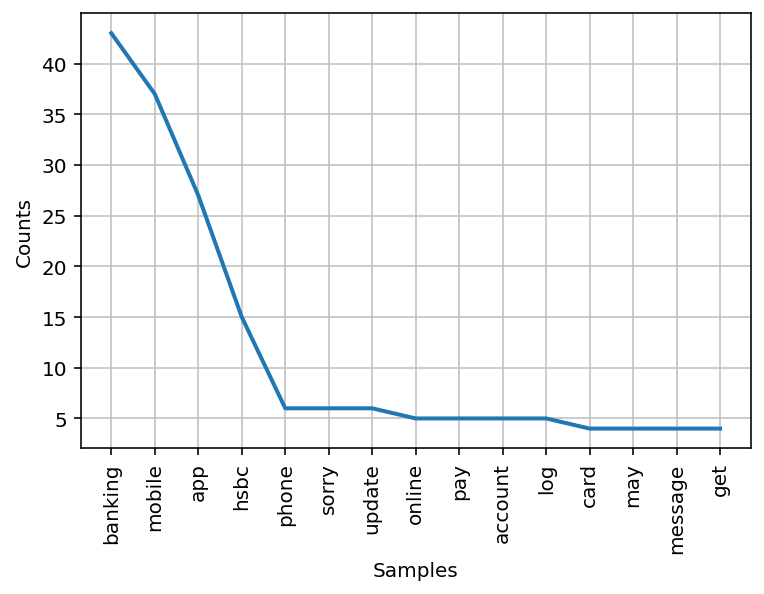

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
fw_fd.plot(15, cumulative=False)